In [9]:
import time
import random
import pandas as pd
import numpy as np
import requests
import json

user="2615aa2d9a9c4e1d63a9b961b018cc68"
pwd="q6x-RFUjwvc_rdhGyCLeKxkSrDiHNcA07e0pL6EO"
url_ravelry="https://api.ravelry.com/"

In [10]:
# get data, scrolling pages
def get_text_allpage(url,content='favorites'):
    output=requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd),data={'page_size': 40}).json()
    num_pages=output['paginator']['last_page']
    data=output[content]
    for page in range(2,num_pages+1):
        try:
            output=requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd),data={'page_size': 40,'page': page}).json()
        except:
            print('page loading error: <',url,'> page ',page)
            continue
        data.extend(output[content])
        #print(page)
        
    return data

def get_text_onepage(url):

    result = requests.get(url,auth=requests.auth.HTTPBasicAuth(user, pwd)).json()
    
    return result

### user id subsetting

In [3]:
user_all=pd.read_csv("user_all.csv",header=0,sep='^') # all active users

In [4]:
user_all=user_all.set_index(['user_id'])
austin_name=['austin, texas','austin,texas',
             'austin,tx','austin, tx','austin']
nyc_name=['new york city,ny','new york city, ny','new york, ny',
          'new york,ny','new york,new york','new york ,new york',
          'new york city','new york']
user_nyc=user_all[user_all['location'].str.lower().isin(nyc_name)]
user_nyc.to_csv('user_nyc.csv',sep='^')
user_austin=user_all[user_all['location'].str.lower().isin(austin_name)]
user_austin.to_csv('user_austin.csv',sep='^')

## user favorite list to yarns

### single user

In [3]:
def favorites_permalink_per_user(user_dat,filename):
    url_fav_list=url_ravelry+'people/'+user_dat.user_name+'/favorites/list.json'
    fav_list=get_text_allpage(url_fav_list,content='favorites')


    for f in fav_list:
        current_fav={"username":user_dat.user_name}
              #"location":user_dat.location}
        current_fav['time']=f['created_at']
        fav_type=f['type']

        if fav_type == 'pattern':
            content=f['favorited']
            current_fav['permalink']=content['permalink']
            if content['first_photo']:
                current_fav['first_photo']=\
                    content['first_photo']['medium_url']
            index=content['id']
            current_save=pd.DataFrame(current_fav,
                                     index=[index])
            #add to file
            f = open(filename, 'a')
            current_save.to_csv(f,sep="^", header = False)
            f.close()


In [176]:
data=user_nyc.iloc[:3]
filename='user_fav_pat.csv'

for index, row in data.iterrows():
    favorites_permalink_per_user(row,filename)

In [126]:
name='PaulineSW'
url_fav_list=url_ravelry+'people/'+name+'/favorites/list.json'
fav_list=get_text_allpage(url_fav_list,content='favorites')

In [177]:
user_nyc

,user_name,location
user_id,,
2886061,aylin16,New York
19205,meggospurls,New York
462928,Drarra,New York
868084,SimoneIlana,New York City
1568707,laurenpitt,New York
4029364,Aliceinyc,New York
36467,anne107,New York
7090427,sophiabspencer,New York
2387547,joybaby999,new york


In [132]:
item_id=fav_list[0]['favorited']['id']#['permalink']
pat=get_text_onepage(url_ravelry+'patterns/'+str(item_id)+'.json')

In [160]:
#pat['pattern']['photos']#['pattern_categories']#.keys()
x={'a':1,'b':2,'c':3}
df=pd.DataFrame(x,index=['a'])
df

,a,b,c
a,1,2,3


(75, 75, 3)


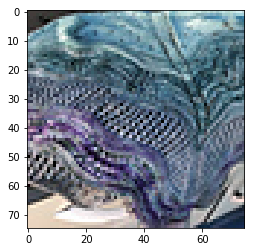

In [156]:
from matplotlib import image
import matplotlib.pyplot as plt
import cv2
import wget

image_url=fav_list[1]['favorited']['first_photo']['square_url']
filename = wget.download(image_url)
np_image1 = cv2.imread(filename)
print(np.shape(np_image1))
plt.imshow(np_image1)

In [152]:
image_url='https://images4-g.ravelrycache.com/uploads/kniisgreat/701934188/A32F7CBE-E26C-4120-AF48-E311E08A61EA_square.jpeg'
filename = wget.download(image_url)
np_image2 = cv2.imread(filename)
#np_image2=np.asarray(np_image)
np.shape(np_image)

(480, 640, 3)

In [121]:
pat_att=get_text_onepage(url_ravelry+'pattern_attributes/groups.json')
#pat_att['attribute_groups'][2]['pattern_attributes']#['name']

### multiple users

In [ ]:
filename='user_fav.csv'
df_baltimore=df[df.location=='Baltimore'].iloc[:3]
user=df_baltimore
for index, row in user.iterrows():
    try:
        favorites_per_user(row,filename)
    except:
        print(row.username,'cannot load favorites')
        continue
    print(row.user_id,row.user_name,'fav loaded')

### combine csv job_id

In [ ]:

file_nyc="fav_list_csv/user_fav_nyc_"
file_austin="fav_list_csv/user_fav_austin_"

In [ ]:
fav_nyc=pd.read_csv(file_nyc+'0.csv',header=0,sep='^')
fav_austin=pd.read_csv(file_austin+'0.csv',header=0,sep='^')

for i in range(1,200):
    fn_nyc=file_nyc+str(i)+'.csv'
    fn_austin=file_austin+str(i)+'.csv'
    fnyc=pd.read_csv(fn_nyc,header=0,sep='^')
    faustin=pd.read_csv(fn_austin,header=0,sep='^')
    fav_nyc=fav_nyc.append(fnyc)
    fav_austin=fav_austin.append(faustin)

In [99]:
pat_fav=pd.read_csv("user_fav_pat_nyc_all.csv",header=0,sep='^')
pat_fav['first_photo'][4]

'https://images4-g.ravelrycache.com/uploads/lindina62/471166216/_CLM9234_medium.jpg'

In [101]:
pat_fav.rename(columns={'Unnamed: 0':'pattern_id'},inplace=True)

In [131]:
pat_fav_list=(pat_fav.drop(columns=['username','time'])
              .sort_values(['pattern_id','first_photo'])).drop_duplicates()
pat_fav_list=pat_fav_list.set_index('pattern_id')

In [133]:
pat_fav_list.to_csv("pat_fav_list_nyc_unique.csv",sep="^")

In [4]:
#pat_fav_list.to_csv("pat_fav_list_nyc_unique.csv",sep="^"
pat_fav_list=pd.read_csv("pat_fav_list_nyc_unique.csv",sep="^",header=0)

In [29]:
pattern_id=pat_fav_list.iloc[1].pattern_id
photo=pat_fav_list.iloc[1].first_photo

(500, 369, 3)


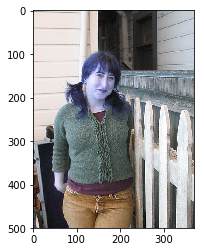

In [30]:
from matplotlib import image
import matplotlib.pyplot as plt
import cv2
import wget

image_url=photo
filename = wget.download(image_url)
np_image1 = cv2.imread(filename)
print(np.shape(np_image1))
plt.imshow(np_image1)

In [31]:
pattern_url=url_ravelry+'patterns/'+str(pattern_id)+'.json'
pattern=get_text_onepage(pattern_url)

In [33]:
categories= pattern['pattern']['pattern_categories']

cat=[]
for c in categories:
    cat.append(c['name'])#[0]#['parent']
    


[{'id': 304,
  'name': 'Cardigan',
  'permalink': 'cardigan',
  'parent': {'id': 319,
   'name': 'Sweater',
   'permalink': 'sweater',
   'parent': {'id': 302,
    'name': 'Clothing',
    'permalink': 'clothing',
    'parent': {'id': 301, 'name': 'Categories', 'permalink': 'categories'}}}}]

In [34]:
photo


'https://images4-g.ravelrycache.com/uploads/BigSister/522767750/103587911_13ad38b338_b_medium.jpg'

In [5]:
pat_fav_list

for index, row in pat_fav_list.iterrows():
    url=row.first_photo
    pattern=url_ravelry+'patterns/'+str(row.pattern_id)+'.json'
    categories

,pattern_id,first_photo
0,10,https://images4-g.ravelrycache.com/uploads/cas...
1,13,https://images4-g.ravelrycache.com/uploads/Big...
2,16,https://images4-g.ravelrycache.com/uploads/Col...
3,17,https://images4-g.ravelrycache.com/uploads/fre...
4,20,https://images4-f.ravelrycache.com/uploads/pie...
5,21,https://images4-f.ravelrycache.com/uploads/Bob...
6,22,https://images4-g.ravelrycache.com/uploads/cas...
7,24,https://images4-g.ravelrycache.com/flickr/5/5/...
8,27,https://images4-g.ravelrycache.com/uploads/Soo...
9,28,https://images4-f.ravelrycache.com/uploads/cas...


In [97]:
pat_fav=pd.read_csv("pat_fav_list_nyc_unique.csv",header=0,sep='^')
pat_fav.iloc[0]

pattern_id                                                    10
first_photo    https://images4-g.ravelrycache.com/uploads/cas...
Name: 0, dtype: object

In [7]:
x={'a':1,'b':2,'c':3}
df=pd.DataFrame(x,index=['a'])
df

,a,b,c
a,1,2,3


In [57]:
pat_sub=pat_fav[pat_fav.index%100==1]

In [96]:
print(((pat_fav[pat_fav.pattern_id==920670])['first_photo']).astype('|S'))


189645    b'https://images4-f.ravelrycache.com/uploads/C...
Name: first_photo, dtype: bytes952


In [11]:
cat_list=get_text_onepage(url_ravelry+'pattern_categories/list.json')

In [30]:
clothing=cat_list['pattern_categories']['children'][0]['children']
accessory=cat_list['pattern_categories']['children'][1]['children']

In [31]:
clothing_list=[]
for i in clothing:
    clothing_list.append(i['name'])

In [32]:
clothing_list

['Shrug / Bolero',
 'Vest',
 'Coat / Jacket',
 'Skirt',
 'Shorts',
 'Pants',
 'Leggings',
 'Sweater',
 'Soakers',
 'Onesies',
 'Dress',
 'Robe',
 'Intimate Apparel',
 'Sleepwear',
 'Swimwear',
 'Other',
 'Tops']

In [33]:
accessory_list=[]
for i in accessory:
    accessory_list.append(i['name'])

In [34]:
accessory_list

['Neck / Torso',
 'Feet / Legs',
 'Belt',
 'Bag',
 'Hands',
 'Other Headwear',
 'Hat',
 'Jewelry',
 'Other']

In [50]:
clothing

[{'id': 305,
  'long_name': 'Shrug / Bolero',
  'name': 'Shrug / Bolero',
  'permalink': 'shrug',
  'children': []},
 {'id': 310,
  'long_name': 'Vest',
  'name': 'Vest',
  'permalink': 'vest',
  'children': []},
 {'id': 311,
  'long_name': 'Coat / Jacket',
  'name': 'Coat / Jacket',
  'permalink': 'coat',
  'children': []},
 {'id': 313,
  'long_name': 'Skirt',
  'name': 'Skirt',
  'permalink': 'skirt',
  'children': []},
 {'id': 314,
  'long_name': 'Shorts',
  'name': 'Shorts',
  'permalink': 'shorts',
  'children': []},
 {'id': 316,
  'long_name': 'Pants',
  'name': 'Pants',
  'permalink': 'pants',
  'children': []},
 {'id': 318,
  'long_name': 'Leggings',
  'name': 'Leggings',
  'permalink': 'leggings',
  'children': []},
 {'id': 319,
  'long_name': 'Sweater',
  'name': 'Sweater',
  'permalink': 'sweater',
  'children': [{'id': 304,
    'long_name': 'Cardigan',
    'name': 'Cardigan',
    'permalink': 'cardigan',
    'children': []},
   {'id': 306,
    'long_name': 'Pullover',
    '

In [82]:
item_id=672011
pat=get_text_onepage(url_ravelry+'patterns/'+str(item_id)+'.json')


In [88]:
pat['pattern']['photos'][0]['medium_url']

'https://images4-f.ravelrycache.com/uploads/ThisMustBeSonja/379911349/_SMM2850_medium.jpg'

In [41]:
pat['pattern']['name']

'Talland Tee'

In [48]:
name=''
name=name+('ee')

In [174]:
x='ab.cde'
x[:-3]



'ab.'

In [69]:
item_id=920670
pat=get_text_onepage(url_ravelry+'patterns/'+str(item_id)+'.json')

In [70]:
pat

{'pattern': {'comments_count': 0,
  'created_at': '2019/04/12 13:25:51 -0400',
  'currency': 'USD',
  'difficulty_average': 0,
  'difficulty_count': None,
  'downloadable': True,
  'favorites_count': 115,
  'free': False,
  'gauge': 4.5,
  'gauge_divisor': 4,
  'gauge_pattern': '',
  'generally_available': '2019/04/01 00:00:00 -0400',
  'id': 920670,
  'name': 'Daybreak Trivet',
  'pdf_url': '',
  'permalink': 'daybreak-trivet',
  'price': 5.0,
  'projects_count': 2,
  'published': '2019/04/01',
  'queued_projects_count': 5,
  'rating_average': 0,
  'rating_count': None,
  'row_gauge': 5.0,
  'updated_at': '2020/02/15 20:56:12 -0500',
  'url': '',
  'yardage': 20,
  'yardage_max': 70,
  'personal_attributes': {'favorited': False,
   'bookmark_id': None,
   'queued': False,
   'in_library': False},
  'sizes_available': '',
  'product_id': 527211,
  'currency_symbol': '$',
  'ravelry_download': True,
  'download_location': {'type': 'ravelry',
   'free': False,
   'url': 'http://www.ravel

In [55]:
header='a^b^c'
text_file = open("sample.csv", "w")
text_file.write(header)
text_file.close()

In [137]:
pat_fav_list

,pattern_permelink,first_photo
pattern_id,,
10,the-flower-basket-shawl-s-2014,https://images4-g.ravelrycache.com/uploads/cas...
13,marilyns-not-so-shrunken-cardigan,https://images4-g.ravelrycache.com/uploads/Big...
16,childs-placket-neck-pullover,https://images4-g.ravelrycache.com/uploads/Col...
17,pomatomus,https://images4-g.ravelrycache.com/uploads/fre...
20,amelia-earhart-aviator-cap,https://images4-f.ravelrycache.com/uploads/pie...
21,lead-or-follow-lace-scarf,https://images4-f.ravelrycache.com/uploads/Bob...
22,brilliant-retro,https://images4-g.ravelrycache.com/uploads/cas...
24,airy-scarf,https://images4-g.ravelrycache.com/flickr/5/5/...
27,cherry-blossom-shawl,https://images4-g.ravelrycache.com/uploads/Soo...


In [165]:
d1=pd.read_csv("pat_fav_list_nyc_unique.csv",header=0,sep='^')
d2=pd.read_csv("../marcc/scraping_image_crop/pattern_category_all.csv",header=0,
              sep="^")

In [166]:
d2.drop(columns='Unnamed: 0',inplace=True)


In [167]:
d=pd.merge(d1,d2,how='inner', on="pattern_id")

In [170]:
d.columns

Index(['pattern_id', 'pattern_permelink', 'first_photo', 'category '], dtype='object')

In [184]:
x=np.array([2,1, 1, 2, 3, 4, 4, 1])
(unique, counts)=np.unique(x, return_counts=True)

In [188]:
y={u:c, for(u,c) in zip(unique, counts)}

SyntaxError: invalid syntax (<ipython-input-188-8cd9900af06a>, line 1)

In [187]:
y[0]


array([1, 3])